# Exploratory Data Analysis – Telco Customer Churn

## Objective
The goal of this analysis is to explore customer churn behavior, identify key patterns,
and define metrics that will later be exposed in an interactive Streamlit dashboard

In [4]:
### Data Analysis with Python: A Comprehensive Guide for analyzing and visualizing data using Python libraries
# Importing data analysis libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sqlite3

In [5]:
# Connecting to the SQLite database and loading the data into a DataFrame
DB_PATH = "data/telco_customer_churn.db"
conn = sqlite3.connect(DB_PATH)

In [6]:
# Reading the data from a CSV file
DATA_PATH = 'sample_data/TelcoCustomerChurn.csv'
df = pd.read_csv(DATA_PATH, low_memory=False)
print("Shape of the data:", df.shape)

Shape of the data: (7043, 21)


In [7]:
# Downloading the dataset into the SQLite database
df.to_sql(name = "customers", 
          con=conn, 
          if_exists="replace", 
          index=False)

7043

In [8]:
# Verifying that the data has been loaded into the database and checking the number of rows in the customers table
pd.read_sql_query("SELECT COUNT(*) AS total_rows FROM customers;", conn)

,total_rows
0,7043


In [9]:
# Analyzing the distribution of the target variable (Churn) and the percentage of customers who have churned
query_churn_rate = """
SELECT COUNT(*) AS total_customers,
         SUM(CASE WHEN Churn = 'Yes' THEN 1 ELSE 0 END) AS churned_customers,
         ROUND(1.0 * SUM(CASE WHEN Churn = 'Yes' THEN 1 ELSE 0 END) / COUNT(*), 3) AS churn_rate
FROM customers;
"""
conn.close()

In [10]:
print("Data Head:")
df.head()

Data Head:


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [11]:
# Exploring the data
print("\nData Info:")
df.info()
print("\nData Description:")    
df.describe()


Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-nul

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [12]:
# Data quality checks
from tkinter import N
from joblib import PrintTime


print("\nMissing Values:")
print(df.isnull().sum())

# Checking for duplicates
df.duplicated().sum()

print("\n% of customers that declined the service (Churn):")
df["Churn"].value_counts(normalize=True)


Missing Values:
customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

% of customers that declined the service (Churn):


Churn
No     0.73463
Yes    0.26537
Name: proportion, dtype: float64

In [13]:
# Identifying categorical and numerical columns useful for encoding, visualization, and modeling
categorical_cols = df.select_dtypes(include="object").columns
numerical_cols = df.select_dtypes(include=["int64", "float64"]).columns

categorical_cols, numerical_cols


(Index(['customerID', 'gender', 'Partner', 'Dependents', 'PhoneService',
        'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup',
        'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
        'Contract', 'PaperlessBilling', 'PaymentMethod', 'TotalCharges',
        'Churn'],
       dtype='object'),
 Index(['SeniorCitizen', 'tenure', 'MonthlyCharges'], dtype='object'))

In [14]:
# Data Cleaning and Preprocessing
df["TotalCharges"] = pd.to_numeric(df["TotalCharges"], errors="coerce")

df.isnull().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

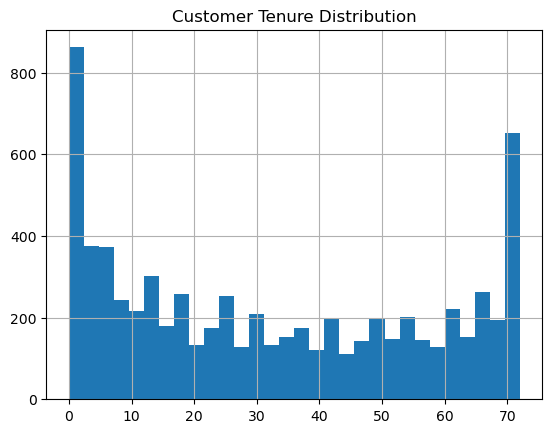

In [15]:
# Visualizing the distribution of customer tenure
df["tenure"].hist(bins=30)
plt.title("Customer Tenure Distribution")
plt.show()


<Axes: xlabel='Churn', ylabel='count'>

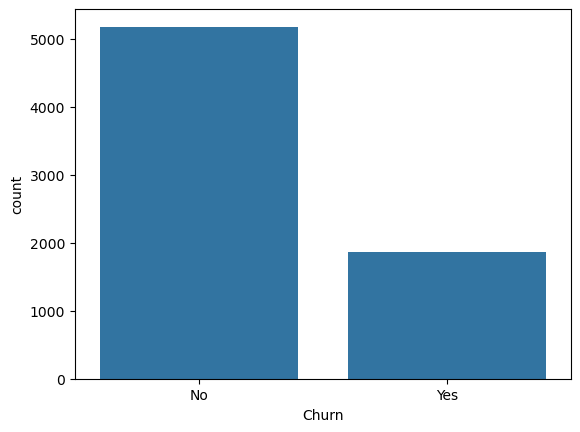

In [16]:
# Visualizing the distribution of the target variable (Churn)
sns.countplot(x="Churn", data=df)

<Axes: xlabel='Churn', ylabel='MonthlyCharges'>

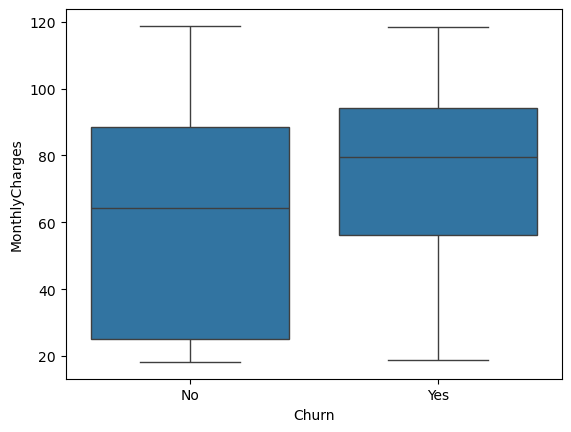

In [17]:
# Visualizing the relationship between MonthlyCharges and Churn
sns.boxplot(x="Churn", y="MonthlyCharges", data=df)

In [18]:
# Analyzing the relationship between Contract type and Churn
pd.crosstab(df["Contract"], df["Churn"], normalize="index")

Churn,No,Yes
Contract,,
Month-to-month,0.572903,0.427097
One year,0.887305,0.112695
Two year,0.971681,0.028319


## Key Findings

- Customers with month-to-month contracts show significantly higher churn rates.
- Lower tenure customers are more likely to churn.
- Higher monthly charges correlate with churn in early tenure segments.

## Metrics to be included in the Dashboard (Streamlit)

- Total customers
- Churn rate
- Average tenure
- Average monthly charges
- Churn by contract type
